In [92]:
#  *W want to look at *Statistical leaders(Top1,Top5,Top 10%,Top25%, Mid 50%, Lower 25 %,) 
#   can we identify correlating/common/advantageous Physical Attributes( Age, Ht, Wt)
#   of those Statical Leaders compare to our Control(non-bias(ALL NBA Players))

In [93]:
#dependencies
import pandas as pd
import os
import csv


In [94]:
player_data = './resources/player_data.csv'
player_data = pd.read_csv(player_data)
# player_data provides ht:wt as ins:lbs
player_data['name']

player_data = player_data.rename(columns={'name': 'Player'})
player_data

players = './resources/Players.csv'
players = pd.read_csv(players)
# players provides ht:wt as cm:kg
players['Player']

Player_Profile_dirty = pd.merge(player_data, players,
                                 how='left', on=["Player","Player"])

In [95]:
#?? sorting by first name 
Player_Profile_dirty.sort_values("Player", inplace = True) 
  
#?? dropping ALL duplicte values 
Player_Profile_dirty.drop_duplicates(subset ="Player", 
                     keep = False, inplace = True) 
  
##### Player_Profile_dirty

Player_Profile = Player_Profile_dirty.dropna(axis = 0, how ='any') 
  
# comparing sizes of data frames 
print("Old data frame length:", len(Player_Profile_dirty), "\nNew data frame length:",  
       len(Player_Profile), "\nNumber of rows with at least 1 NA value: ", 
       (len(Player_Profile_dirty)-len(Player_Profile)))

Old data frame length: 4453 
New data frame length: 3019 
Number of rows with at least 1 NA value:  1434


In [98]:
#    In the 'Player_Profile' dataframe you find:
#    Players Names, Career Position, Physical Attributes, Birth Info, & Geological BackGround

print("We made a  << Player_Profile >>  for all ***NBA PLayers***       <--like a ID card with no stats") 
print('----------------------'*5)
Player_Profile
#     Player Profile: provide player databack ground data(non controlables), but does not provide performance data(STATS))

We made a  << Player_Profile >>  for all ***NBA PLayers***       <--like a ID card with no stats
--------------------------------------------------------------------------------------------------------------


,Player,year_start,year_end,position,height_x,weight_x,birth_date,college,Unnamed: 0,height_y,weight_y,collage,born,birth_city,birth_state
474,Aaron Brooks,2008,2018,G,6-0,161.0,"January 14, 1985",University of Oregon,3211.0,183.0,73.0,University of Oregon,1985.0,Seattle,Washington
1451,Aaron Gordon,2015,2018,F,6-9,220.0,"September 16, 1995",University of Arizona,3707.0,206.0,99.0,University of Arizona,1995.0,San Jose,California
1489,Aaron Gray,2008,2014,C,7-0,270.0,"December 7, 1984",University of Pittsburgh,3225.0,213.0,122.0,University of Pittsburgh,1984.0,Tarzana,California
1666,Aaron Harrison,2016,2017,G,6-6,210.0,"October 28, 1994",University of Kentucky,3780.0,198.0,95.0,University of Kentucky,1994.0,San Antonio,Texas
1945,Aaron James,1975,1979,F,6-8,210.0,"October 5, 1952",Grambling State University,1040.0,203.0,95.0,Grambling State University,1952.0,New Orleans,Louisiana
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2339,Zach LaVine,2015,2017,G,6-5,189.0,"March 10, 1995","University of California, Los Angeles",3724.0,196.0,85.0,"University of California, Los Angeles",1995.0,Renton,Washington
3312,Zach Randolph,2002,2018,F-C,6-9,260.0,"July 16, 1981",Michigan State University,2825.0,206.0,117.0,Michigan State University,1981.0,Marion,Indiana
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University,746.0,206.0,106.0,Iowa State University,1946.0,Brooklyn,New York
4531,Zeke Zawoluk,1953,1955,F-C,6-7,215.0,"October 13, 1930",St. John's University,318.0,201.0,97.0,St. John's University,1930.0,Brooklyn,New York


In [86]:
###### These are the 'Career Positions' of NBA PLAYERS,
# The general understanding of thier primary position and role throughout a NBA PLAYER's career.

print("Career Positions from Payer_Profile")
Player_Profile['position'].value_counts()

Career Positions from Payer_Profile


G      1083
F       854
C       306
F-C     267
G-F     227
C-F     147
F-G     135
Name: position, dtype: int64

In [99]:
# NEXT: We import    ***The Seasons Stats***,    for ever *** NBA Player, on a Team, for each Year ***.")
#    ex. if a player was traded 3 times in one Season it will show 3 rows of *Performance Stats for that Year for that Player


# Additionly, A player's "Yearly Position/Desired Performence" will alter their perfomance behavior 
# and thus increase/decrease opportunity to contribute to Performance statics as they may have at a diffent yearly position
#    ex. SG><SF, SF><G, C><SF,
#      Obviously,  there most be a Reason why Career Centers (C) havent held a 'yearly position' as Gaurds (G) 
#       perhaps its a Physical thing ??? duh?
#     justifying that each Position has a uniform for desired statistical traits that can be identified amongst a range
#     of Statistical leaders/Players in those particular (Top15, Top100, All NBA PLayers,etc) who hold that postion


###  *Now lookign at those *Statistical leaders(Top1,Top5,Top 10%,Top25%, Mid 50%, Lower 25 %,) 
###   can we identify correlating/common/advantageous Physical Attributes( Age, Ht, Wt)
###   of those Statical Leaders compare to our Control(non-bias(ALL NBA Players))

In [100]:
print(" 'Year Position'   Player positions may change amongst the years but not their Career Position from their Player_Profile")
stats_data = './resources/Seasons_Stats.csv'
stats_data = pd.read_csv(stats_data)
stats_data['Pos'].value_counts()

 'Year Position'   Player positions may change amongst the years but not their Career Position from their Player_Profile


PF       4966
SG       4811
C        4759
SF       4699
PG       4648
G         139
F         123
F-C        81
G-F        79
F-G        60
C-F        35
C-PF       33
SF-SG      30
PG-SG      28
PF-C       27
SG-PG      27
SG-SF      26
PF-SF      25
SF-PF      21
SG-PF       3
C-SF        2
PG-SF       1
SF-PG       1
Name: Pos, dtype: int64

In [101]:

### We now Merge the to DataFrames together
### Merge the   Players Profile  +  stats_data = NBA_All_Stats_and_Profile/(COMPLETE PLAYER DATA Unedited)

NBA_All_Stats_and_Profile_df = pd.merge(Player_Profile, stats_data,
                                 how='left', on=["Player","Player"])
list(NBA_All_Stats_and_Profile_df)

['Player',
 'year_start',
 'year_end',
 'position',
 'height_x',
 'weight_x',
 'birth_date',
 'college',
 'Unnamed: 0_x',
 'height_y',
 'weight_y',
 'collage',
 'born',
 'birth_city',
 'birth_state',
 'Unnamed: 0_y',
 'Year',
 'Pos',
 'Age',
 'Tm',
 'G',
 'GS',
 'MP',
 'PER',
 'TS%',
 '3PAr',
 'FTr',
 'ORB%',
 'DRB%',
 'TRB%',
 'AST%',
 'STL%',
 'BLK%',
 'TOV%',
 'USG%',
 'blanl',
 'OWS',
 'DWS',
 'WS',
 'WS/48',
 'blank2',
 'OBPM',
 'DBPM',
 'BPM',
 'VORP',
 'FG',
 'FGA',
 'FG%',
 '3P',
 '3PA',
 '3P%',
 '2P',
 '2PA',
 '2P%',
 'eFG%',
 'FT',
 'FTA',
 'FT%',
 'ORB',
 'DRB',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PTS']

In [102]:
# #list all columns and create new columns I want (height and weight)

new_columns = [
    'Year',
    'Player',
    'Pos',
    'position',
    'Age',
    'height_x','height_y',
    'weight_x','weight_y',
    'DRB','STL','BLK',
    'TRB',
    'ORB',
    'AST',
    'PTS',
    'FG','FGA','FG%','eFG%',
    '3P','3PA','3P%',
    '2P','2PA','2P%',
    'FT','FTA','FT%',
    'TOV',
    'PF',
    'G',
    'GS',
    'MP',
    'Tm',
    'born','birth_date','birth_city','birth_state',
    'collage','college',
    'PER']
NBA_Unedited_Coloumns_df = NBA_All_Stats_and_Profile_df[new_columns]


NBA_df = NBA_Unedited_Coloumns_df.rename(columns={'Pos':"Year Position",
                                   "position":'Career Position',
                                   "MP":"Minutes Per Seasom",
                                   "Tm":"Team",
                                   "G":"Games Played",
                                   "GS":"Games Started",
                                   "PF":"Personal Fouls",
                                   "birth_state":"Birth City",
                                   "birth_city":"Birth State",
                                   "birth_date":"DOB",
                                   "born":"YearBorn",
                                   "height_x":"Ht:ins",
                                   "height_y":"Ht:cm",
                                   "weight_x":"Wt:lbs",
                                   "weight_y":"Wt:kgs",
                                   "PER":"Player Rating",
                                  })
# NBA_df

In [103]:
#THIS WILL BE THE DATA FRAME WE BUILD OUR 4 POSITIONS FROM
NBA_df.to_csv('./NBA_dfs/All_NBA_PLayers_PPS.csv') 

In [ ]:
##   Now we seperate Players into theier Career Position(G, F, C,) 
##   we will use NBA_df to represent all NBA PLayers(<--Our Control).

## NBA_df = ALL NBA PLAYER
## C_NBA_df = GAURDS
## F_NBA_DF = FORWARDS
## G_NBA_DF = CENTERS


In [118]:
#  1ST  NBA Forwards by Career Position (They trend to be an all around Player aka your "BIGGIE SMALLS", whos role/'yearly position' 
#                               is assigned by his Perf. Behavior and Phy. Attributes(ex.BLK:Ht , (REB:FT):Ht, (STL:Ht):PF, etc) that are sought to be applied,
#                               it justifys why Fowards are rotated bewteen Guards and Centers. Thier role is more expressed under "Year Position ex. SF, PF,and F")

F_NBA_df = NBA_df.loc[(NBA_df['Career Position']== "F")|
                      (NBA_df['Career Position']== "F-G")|
                      (NBA_df['Career Position']== "F-C")|
                      (NBA_df['Career Position']== "C-F")|
                      (NBA_df['Career Position']== "G-F")] 
F_NBA_df.to_csv('./NBA_dfs/All_Fowards_PPS.csv')
# F_NBA_df['Career Position'].value_counts()

In [119]:
# F_NBA_df['Year Position'].value_counts()

In [120]:
#  2ND  NBA Centers by Career Position

C_NBA_df = NBA_df.loc[(NBA_df['Career Position']== "C")|
                      (NBA_df['Career Position']== "C-F")|
                      (NBA_df['Career Position']== "F-C")] 
C_NBA_df.to_csv('./NBA_dfs/All_Centers_PPS.csv')

# C_NBA_df['Career Position'].value_counts()

In [121]:
# C_NBA_df['Year Position'].value_counts()

In [122]:
#  3RD  NBA Guards by Career Position
G_NBA_df = NBA_df.loc[(NBA_df['Career Position']== "G")|
                      (NBA_df['Career Position']== "G-F")|
                      (NBA_df['Career Position']== "F-G")] 
G_NBA_df.to_csv('./NBA_dfs/All_Guards_PPS.csv')
G_NBA_df['Career Position'].value_counts()

G      6567
G-F    1694
F-G    1045
Name: Career Position, dtype: int64

In [123]:
G_NBA_df['Year Position'].value_counts()
# WE SEE THAT A 'Career Gaurd' may, but is not likely to play  a 'SOMETIME('Year+') as a 'Foward' BUT NOT CENTER,

PG       3848
SG       3774
SF       1391
G          70
PF         53
G-F        38
F-G        38
PG-SG      26
SG-PG      22
SF-SG      22
SG-SF      18
SG-PF       2
PF-SF       2
PG-SF       1
SF-PF       1
Name: Year Position, dtype: int64

In [114]:
# NOW WE have 4 dataframes of PLayers <-grouped by "Career positon" with "Yearly Position"(which expresses
# the detail of their performance behavior, for that season on that team.)
#
#### Next we need to MAKE NEW DATAFRAMEs that only have the TIME RANGE for which we like to use.
#### in this case 1982 - current


In [82]:
NBA_82_17_df = NBA_df.loc[(NBA_df['Year']>=1982)] 
NBA_82_17_df.to_csv('./NBA_dfs/All_NBA_82_17_PPS.csv')
# NBA_82_17_df.sort_values(by=['Year'])

In [ ]:
C_82_17_df = C_NBA_df.loc[(C_NBA_df['Year']>=1982)] 
C_82_17_df.to_csv('./NBA_dfs/All_Centers_82_17_PPS.csv')
# C_82_17_df.sort_values(by=['Year'])

In [ ]:
F_82_17_df = F_NBA_df.loc[(F_NBA_df['Year']>=1982)] 
F_82_17_df.to_csv('./NBA_dfs/All_Forwards_82_17_PPS.csv')
# F_82_17_df.sort_values(by=['Year'])

In [ ]:
G_82_17_df = G_NBA_df.loc[(G_NBA_df['Year']>=1982)]
G_82_17_df.to_csv('./NBA_dfs/All_Guards_82_17_PPS.csv')
# G_82_17_df.sort_values(by=['Year'])

In [47]:
Gaurds = G_82_17_df.groupby(['Player']).mean()
gg= pd.DataFrame(Gaurds)
G_pts = gg.sort_values(['BLK'], ascending=False)
G_pts

,Year,Age,Ht:cm,Wt:lbs,Wt:kgs,DRB,STL,BLK,TRB,ORB,...,FT,FTA,FT%,TOV,Personal Fouls,Games Played,Games Started,Minutes Per Seasom,YearBorn,Player Rating
Player,,,,,,,,,,,,,,,,,,,,,
Terry Tyler,1985.5,28.5,201.0,215.0,97.0,232.625000,59.750000,92.625000,354.125000,121.500000,...,95.125000,130.750000,0.722875,82.625000,153.875000,78.125000,31.875000,1745.125000,1956.0,13.825000
Kevin Durant,2012.5,23.5,206.0,240.0,108.0,447.800000,84.000000,73.800000,503.100000,55.300000,...,493.500000,559.600000,0.878100,222.100000,133.000000,70.300000,70.300000,2627.800000,1988.0,25.410000
Reggie Lewis,1990.5,24.5,201.0,195.0,88.0,226.833333,94.833333,69.500000,323.000000,96.166667,...,246.500000,299.000000,0.806833,118.000000,211.333333,75.000000,58.666667,2446.000000,1965.0,16.700000
Dwyane Wade,2010.5,28.5,193.0,220.0,99.0,232.642857,107.142857,57.142857,314.071429,81.428571,...,386.285714,502.928571,0.767500,215.714286,149.000000,65.357143,64.571429,2310.857143,1982.0,23.942857
Rodney McCray,1988.5,26.5,201.0,220.0,99.0,344.200000,58.500000,49.300000,508.700000,164.500000,...,192.500000,252.900000,0.752300,141.900000,173.400000,76.800000,62.900000,2487.600000,1961.0,13.890000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Skeeter Henry,1994.0,26.0,201.0,190.0,86.0,2.000000,0.000000,0.000000,2.000000,0.000000,...,2.000000,4.000000,0.500000,1.000000,1.000000,4.000000,0.000000,15.000000,1967.0,5.600000
LaMark Baker,1999.0,29.0,185.0,175.0,79.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,NaN,1.000000,0.000000,1.000000,0.000000,2.000000,1969.0,-46.600000
Dennis Nutt,1987.0,23.0,188.0,170.0,77.0,7.000000,7.000000,0.000000,8.000000,1.000000,...,20.000000,22.000000,0.909000,10.000000,6.000000,25.000000,0.000000,91.000000,1963.0,20.000000


In [48]:
import matplotlib.pyplot as plt

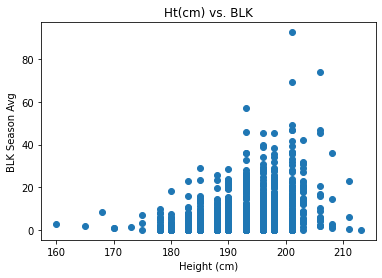

In [49]:
# Height : Block 

plt.scatter(gg['Ht:cm'],gg['BLK'])
plt.title("Ht(cm) vs. BLK")
plt.xlabel('Height (cm)')
plt.ylabel('BLK Season Avg')
plt.show()



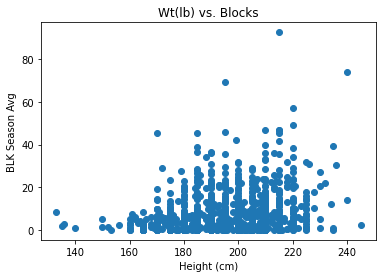

In [50]:
plt.scatter(gg['Wt:lbs'],gg['BLK'])
plt.title("Wt(lb) vs. Blocks")
plt.xlabel('Height (cm)')
plt.ylabel('BLK Season Avg')
plt.show()

In [51]:
import scipy.stats as st

In [54]:
#calculating correlation between height and PTS
correlation = round(st.pearsonr(gg['Ht:cm'],gg['BLK'])[0],2)
print(f"The correlation between both factors is {correlation}")

The correlation between both factors is 0.32


In [55]:
#calculating correlation between weight and PTS
correlation = round(st.pearsonr(gg['Wt:lbs'],gg['BLK'])[0],2)
print(f"The correlation between both factors is {correlation}")

The correlation between both factors is 0.27


In [58]:
from scipy.stats import linregress

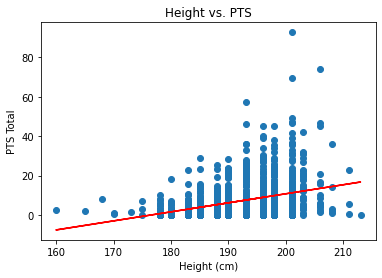

In [60]:

(slope, intercept, rvalue, pvalue, stderr) = linregress(gg['Ht:cm'],gg['BLK'])
regress_values = gg['Ht:cm'] * slope + intercept

plt.scatter(gg['Ht:cm'],gg['BLK'])
plt.plot(gg['Ht:cm'],regress_values, color='r')
plt.title("Height vs. PTS")
plt.xlabel('Height (cm)')
plt.ylabel('PTS Total')
plt.show()